In [1]:
import sys, getopt

import pandas as pd
import numpy as np

import re
import os

from style_feature import Style_Feature

from sklearn.externals import joblib

from read_path import load_img

from operator import itemgetter
import matplotlib.pyplot as plt
import cv2 


In [2]:
def     read(data_path, style_obj):
    data = None
    print "Load %s" % data_path
    data = pd.read_csv(data_path)    
    imgs = [load_img(img_path) for img_path in data['img_path'] if os.path.exists(img_path)]
    imgs = [img for img in imgs if img is not None]
    features = np.array([style_obj.get_feature(img) for img in imgs])    
    return features, data['img_path']

In [3]:
data_path = '/home/anla/Source/data/images/sample_4k.csv'
style_obj = Style_Feature(lab = 1, gist = 0, gist_processmodel = None)    
features, img_path = read(data_path, style_obj)

Load /home/anla/Source/data/images/sample_4k.csv


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [5]:
from clustering import clustering
from cluster.visualize import transform
from sklearn import svm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.cm as cm

In [7]:
# features = features.reshape(400, 8)

In [8]:
cluster_folder = '/home/anla/Source/python/style_feature_extraction/cluster/GMM/lab'

In [9]:

def visualize(features, P, cluster_labels, n_cluster, out_path):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(features) + (n_cluster + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_cluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(features, cluster_labels)    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    tx = [i[0] for i in P]
    txmin, txmax = np.min(tx), np.max(tx)
    tx = [(i[0] - txmin)/(txmax - txmin) for i in P]
    
    ty = [i[1] for i in P]
    tymin, tymax = np.min(ty), np.max(ty)
    ty = [(i[1] - tymin)/(tymax - tymin) for i in P]
    
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(tx, ty, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.savefig('%s/cluster.png' % out_path, bbox_inches='tight')
    plt.show()

In [13]:
glb_features = features

In [15]:
drop_idx = [i for i in range(len(glb_features)) if glb_features[i] is None]
if len(drop_idx) > 0:
    glb_features = np.delete(glb_features,drop_idx,axis=0)
    
features = np.zeros((len(glb_features), len(glb_features[0])))
for i in range(len(glb_features)):
    for j in range(len(glb_features[i])):
        features[i][j] = glb_features[i][j]
print (features.shape)

(3999, 784)


32
Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/spherical_32
    [176, 72, 149, 121, 155, 260, 118, 153, 79, 64, 137, 65, 142, 98, 123, 115, 58, 89, 70, 160, 164, 156, 98, 72, 42, 227, 197, 133, 73, 182, 114, 137]
For n_clusters=32, Average Silhouette Coefficient is 0.0762901960252


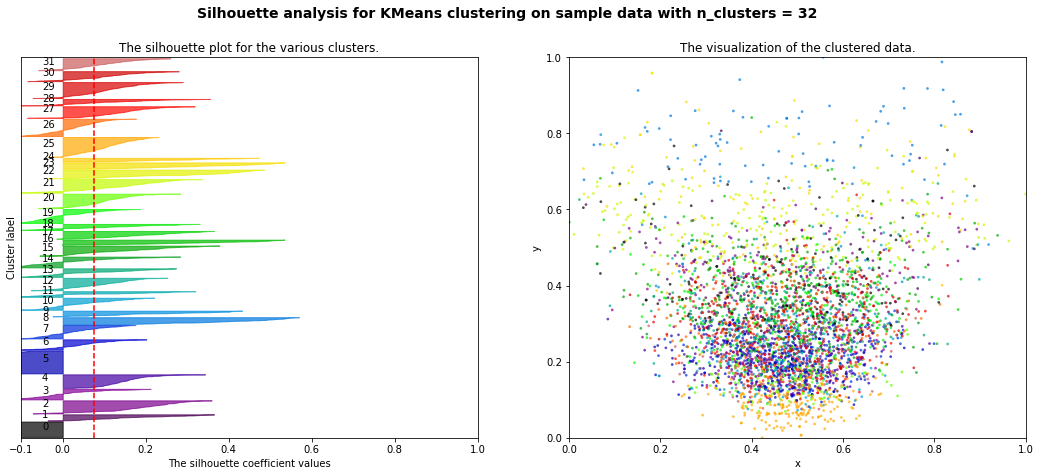

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/diag_32
    [76, 28, 65, 84, 32, 342, 85, 107, 67, 48, 1, 90, 218, 43, 65, 61, 30, 244, 125, 40, 114, 303, 72, 106, 245, 90, 51, 49, 737, 115, 195, 71]
For n_clusters=32, Average Silhouette Coefficient is -0.231244442428


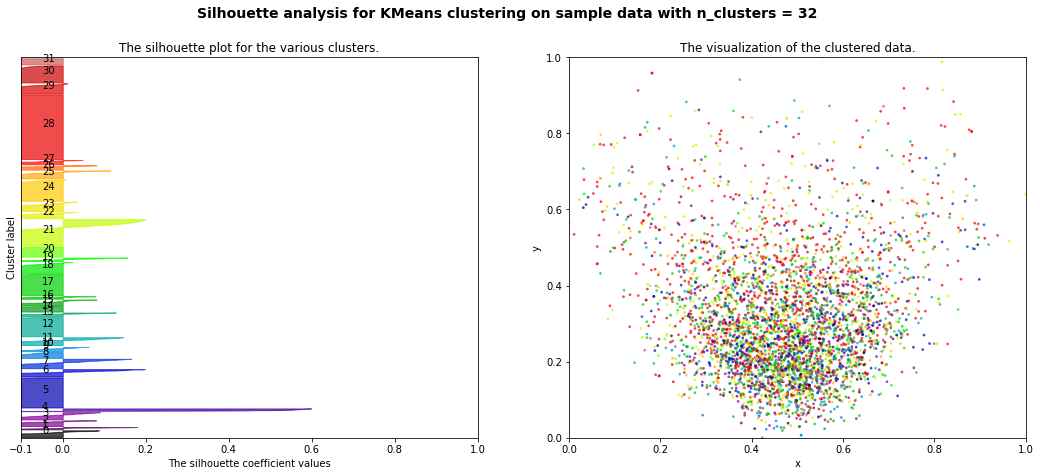

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/full_32
    [87, 4, 98, 122, 52, 451, 130, 179, 151, 50, 8, 34, 99, 32, 80, 139, 98, 582, 6, 91, 158, 22, 60, 127, 158, 134, 22, 82, 320, 54, 275, 94]
For n_clusters=32, Average Silhouette Coefficient is -0.118575273745


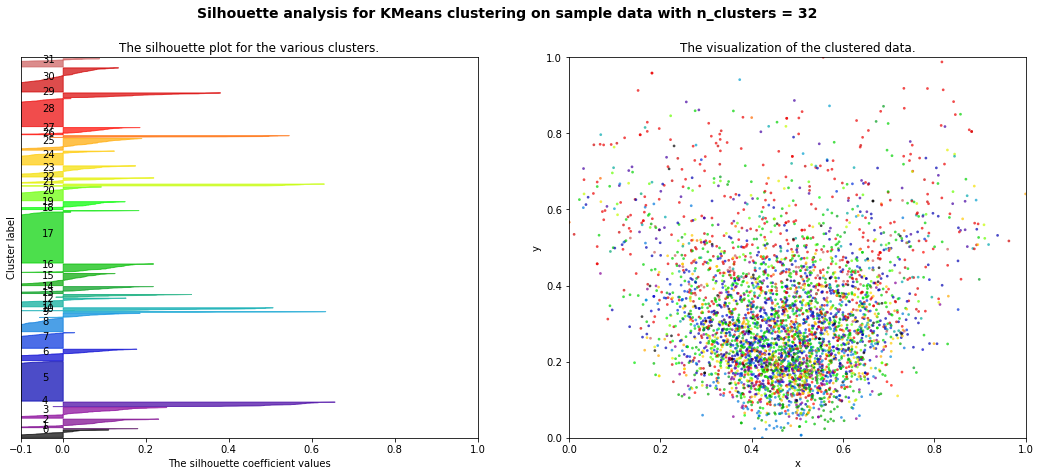

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/tied_32
    [24, 20, 292, 74, 20, 110, 47, 54, 38, 23, 34, 137, 35, 22, 14, 53, 1628, 144, 16, 210, 23, 369, 105, 12, 21, 37, 12, 115, 113, 30, 80, 87]
For n_clusters=32, Average Silhouette Coefficient is 0.0805888969033


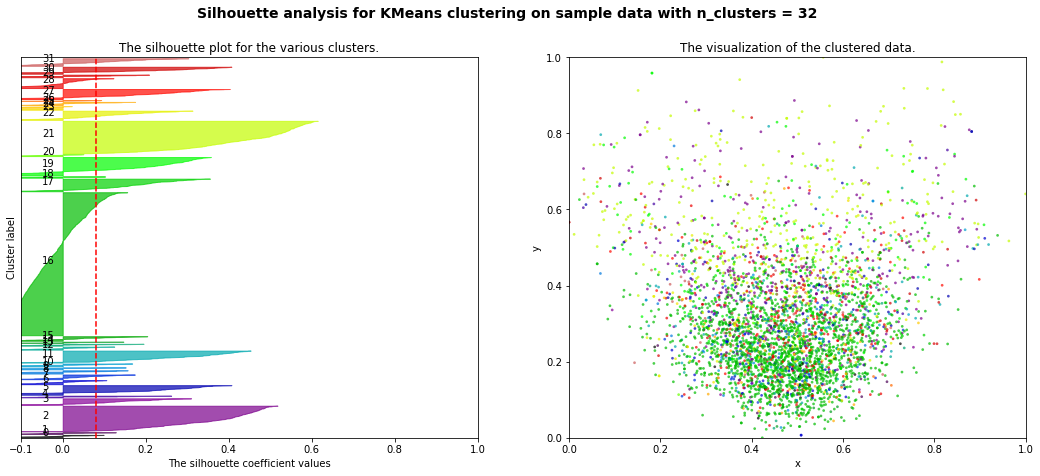

48
Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/spherical_48
    [90, 112, 51, 142, 83, 82, 51, 133, 216, 143, 113, 1, 97, 67, 42, 55, 71, 59, 85, 89, 141, 73, 97, 139, 44, 31, 108, 48, 99, 83, 74, 89, 55, 96, 1, 79, 86, 95, 97, 43, 105, 122, 64, 103, 1, 99, 54, 91]
For n_clusters=48, Average Silhouette Coefficient is 0.0511559568993


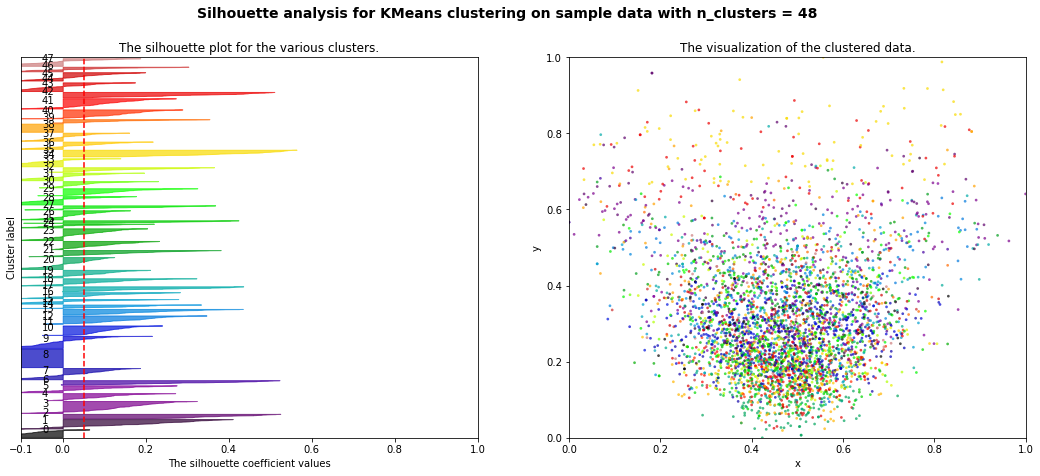

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/diag_48
    [29, 26, 48, 42, 14, 1, 39, 109, 69, 28, 1, 56, 227, 99, 5, 50, 46, 81, 34, 63, 253, 1, 68, 34, 93, 128, 2, 37, 691, 1, 125, 33, 41, 64, 147, 95, 1, 109, 45, 41, 1, 29, 0, 43, 155, 443, 40, 212]
For n_clusters=48, Average Silhouette Coefficient is -0.279879670628


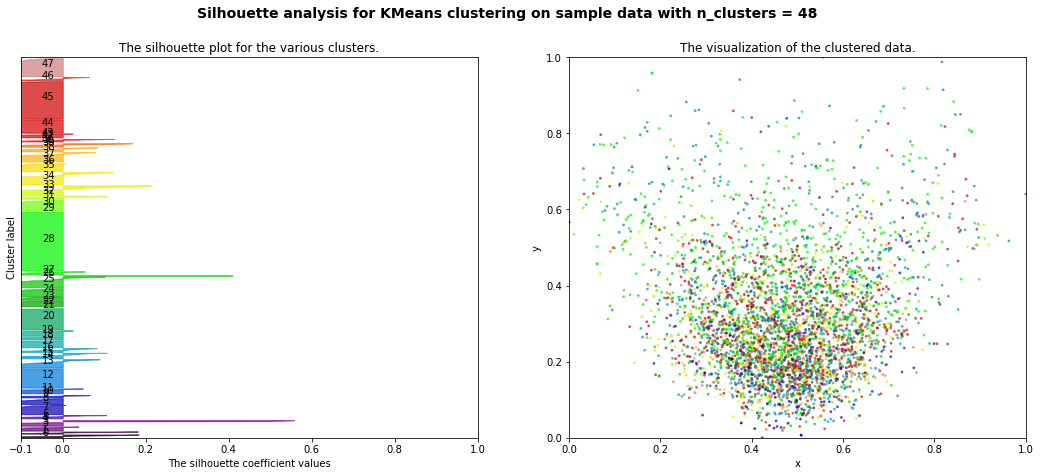

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/full_48
    [82, 2, 225, 47, 30, 1, 90, 648, 159, 64, 2, 9, 2, 181, 9, 92, 89, 673, 51, 1, 85, 10, 4, 88, 23, 61, 6, 60, 1, 1, 20, 72, 6, 131, 8, 0, 1, 225, 8, 23, 3, 83, 0, 75, 13, 25, 140, 370]
For n_clusters=48, Average Silhouette Coefficient is -0.213760055087


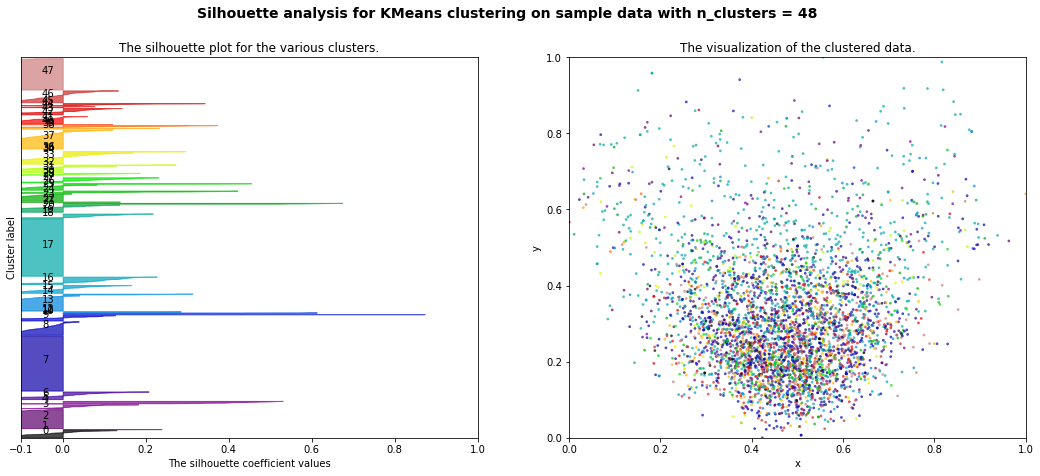

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/tied_48
    [16, 109, 176, 15, 6, 60, 11, 25, 81, 103, 306, 14, 112, 1301, 81, 74, 51, 58, 23, 1, 66, 178, 4, 31, 32, 257, 24, 6, 74, 9, 126, 66, 5, 51, 21, 25, 24, 10, 26, 7, 15, 122, 17, 31, 26, 68, 28, 27]
For n_clusters=48, Average Silhouette Coefficient is 0.0680945539237


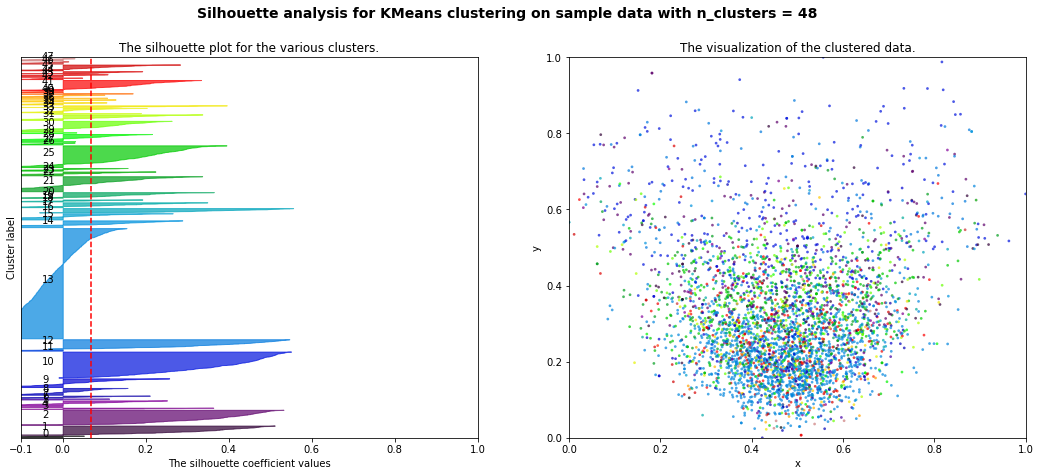

64
Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/spherical_64
    [63, 62, 57, 57, 82, 109, 32, 58, 1, 2, 60, 106, 76, 132, 108, 55, 65, 1, 110, 66, 66, 44, 93, 54, 59, 51, 68, 65, 78, 52, 72, 45, 0, 56, 77, 120, 68, 151, 69, 52, 2, 102, 1, 73, 57, 43, 76, 71, 1, 34, 49, 67, 90, 59, 54, 87, 185, 0, 65, 37, 55, 36, 45, 68]
For n_clusters=64, Average Silhouette Coefficient is 0.0339564031464


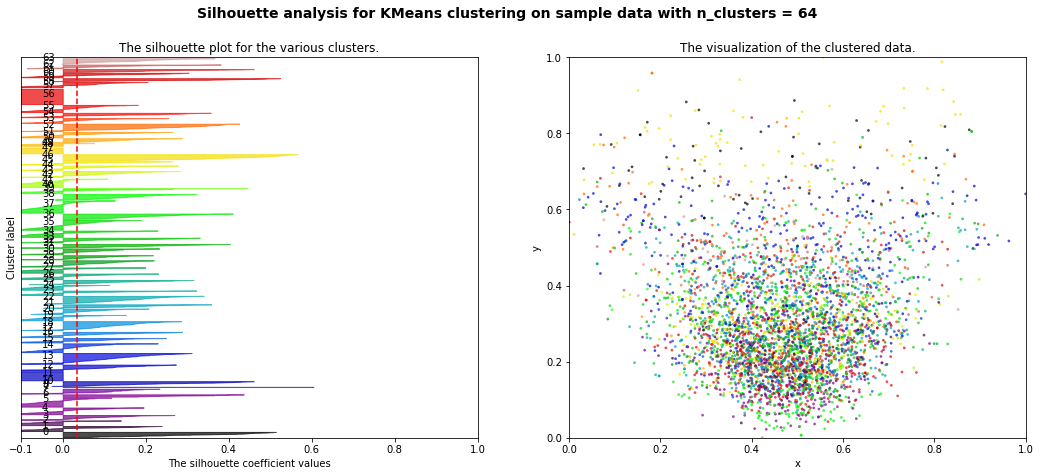

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/diag_64
    [32, 23, 32, 48, 0, 2, 47, 1, 2, 584, 37, 20, 28, 33, 329, 51, 28, 71, 48, 70, 64, 28, 238, 48, 30, 1, 43, 145, 22, 26, 210, 347, 43, 1, 36, 82, 0, 35, 65, 0, 0, 0, 115, 30, 68, 114, 59, 36, 24, 131, 108, 2, 1, 1, 91, 0, 44, 42, 0, 39, 50, 32, 1, 61]
For n_clusters=64, Average Silhouette Coefficient is -0.236615317544


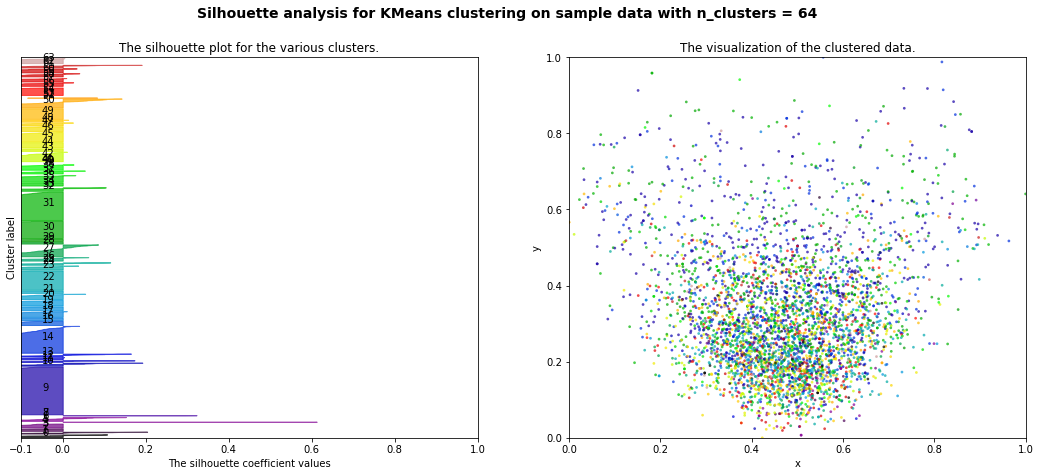

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/full_64
    [5, 5, 119, 66, 1, 7, 89, 46, 1, 10, 45, 2, 46, 139, 295, 142, 9, 49, 83, 295, 42, 53, 40, 84, 33, 0, 193, 23, 7, 2, 558, 559, 28, 6, 2, 20, 5, 88, 14, 0, 1, 0, 15, 83, 8, 6, 79, 84, 2, 14, 296, 4, 4, 0, 33, 0, 27, 6, 0, 81, 0, 4, 12, 29]
For n_clusters=64, Average Silhouette Coefficient is -0.171005661362


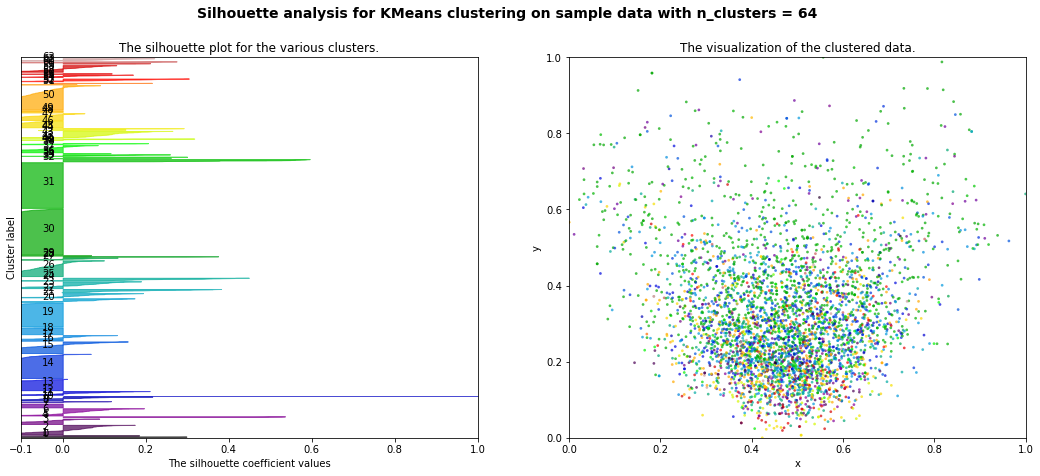

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/lab/tied_64
    [6, 29, 168, 3, 22, 8, 247, 28, 20, 28, 12, 5, 94, 305, 36, 28, 57, 7, 11, 36, 13, 10, 107, 54, 21, 24, 23, 108, 82, 97, 67, 144, 9, 42, 13, 11, 29, 96, 8, 6, 7, 5, 42, 31, 15, 11, 1018, 9, 9, 12, 101, 53, 180, 24, 104, 54, 9, 52, 43, 10, 9, 49, 9, 29]
For n_clusters=64, Average Silhouette Coefficient is 0.0774200907006


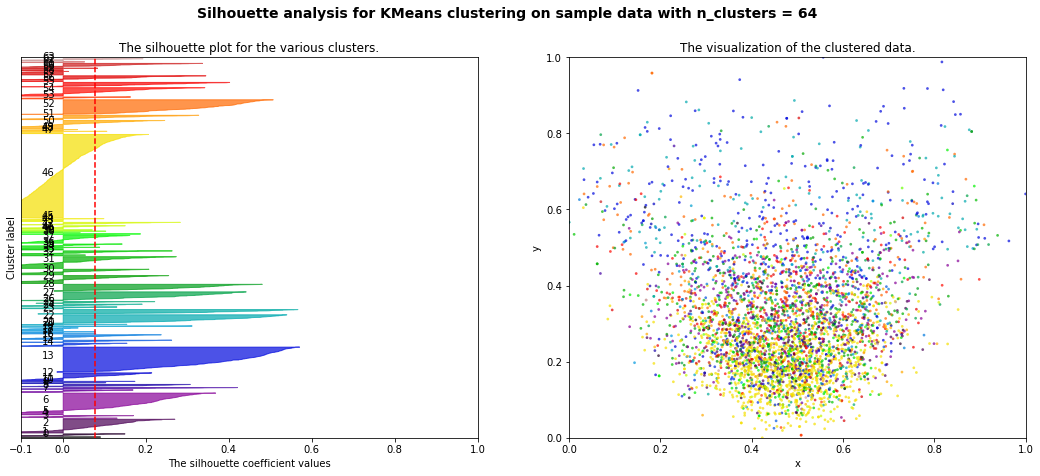

In [16]:
for n_cluster in [32, 48, 64]:
    print n_cluster
    estimators = dict((cov_type, GaussianMixture(n_components=n_cluster,
                   covariance_type=cov_type, max_iter=200, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full']) 

    n_estimators = len(estimators)
    
    label_init = np.random.randint(0, n_cluster, len(features))
    
    label_pred = None
    for index, (name, estimator) in enumerate(estimators.items()):
        estimator.means_init = np.array([features[label_init == i].mean(axis=0) for i in range(n_cluster)])
        estimator.fit(features)
        label = estimator.predict(features)
        clusters = [np.where(label == i)[0] for i in range(n_cluster)]

        folder = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        print 'Generate folder %s' % folder
        print '   ', [len(cluster) for cluster in clusters]
        os.makedirs(folder)
        clustering(clusters, folder, img_path, visualize_mode = True)
    
        P = transform(features)
        sil_coef_avg = silhouette_score(features, label, metric='euclidean')
        print("For n_clusters={}, Average Silhouette Coefficient is {}".format(n_cluster, sil_coef_avg))

#         model = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        visualize(features, P, label, n_cluster, '%s/%s_%d/' % (cluster_folder, name, n_cluster))    
